In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import OneClassSVM
from sklearn import preprocessing

In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
predict = pd.read_csv("data/predict.csv")

In [4]:
#Functions: 
def encode(csv):
    cut = csv.cut
    color = csv.color
    clarity = csv.clarity

    le_cut = preprocessing.LabelEncoder()
    le_color = preprocessing.LabelEncoder()
    le_clarity = preprocessing.LabelEncoder()

    cut_numeric = le_cut.fit_transform(cut)
    color_numeric = le_color.fit_transform(color)
    clarity_numeric = le_clarity.fit_transform(clarity)
    clean = csv.copy()
    clean["cut_numeric"] = cut_numeric
    clean["color_numeric"] = color_numeric
    clean["clarity_numeric"] = clarity_numeric
    clean.drop(columns=["cut", "color", "clarity"], inplace = True)
    return clean

In [5]:
def split(csv):
    X = csv.loc[:, csv.columns != "price"]
    y = csv["price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [6]:
def printMetrics(y_test,y_pred):
    printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")
    printMetric("Accuracy",accuracy_score(y_test, y_pred))
    printMetric("Precision",precision_score(y_test, y_pred, average = "weighted"))
    printMetric("Recall",recall_score(y_test, y_pred, average = "weighted"))
    printMetric("F1Score",f1_score(y_test, y_pred, average = "weighted"))
    printMetric("Mean Square Error", mean_squared_error(y_test,y_pred))
    printMetric("Root Mean Square Error", mean_squared_error(y_test,y_pred, squared = False))

In [7]:
def fitModel(model):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [8]:
def predictModel(model, f = ['carat','table','x','y','z','color_numeric','cut_numeric','clarity_numeric']):
    model = model
    m = model.fit(X_train, y_train)
    prediction = model.predict(encode(predict)[f])
    return prediction

# Inspecting the Data

In [9]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


In [10]:
train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## Non numeric values
### Cut | Color | Clarity 

In [11]:
train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [12]:
train.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,0.002653,0.002349,-0.006281,0.001529,0.001976,0.004030,0.006826
carat,0.002653,1.000000,0.032379,0.181791,0.974898,0.944513,0.947538,0.922567
depth,0.002349,0.032379,1.000000,-0.297164,-0.020876,-0.025105,0.099375,-0.005105
table,-0.006281,0.181791,-0.297164,1.000000,0.194763,0.181585,0.149242,0.129777
x,0.001529,0.974898,-0.020876,0.194763,1.000000,0.967114,0.965114,0.884089
y,0.001976,0.944513,-0.025105,0.181585,0.967114,1.000000,0.940678,0.858536
z,0.004030,0.947538,0.099375,0.149242,0.965114,0.940678,1.000000,0.855923
price,0.006826,0.922567,-0.005105,0.129777,0.884089,0.858536,0.855923,1.000000


In [13]:
print(train.color.value_counts(),"\n\n",
train.cut.value_counts(),"\n\n",
train.clarity.value_counts())

G    8469
E    7375
F    7179
H    6229
D    5012
I    4088
J    2103
Name: color, dtype: int64 

 Ideal        16175
Premium      10272
Very Good     9146
Good          3676
Fair          1186
Name: cut, dtype: int64 

 SI1     9813
VS2     9217
SI2     6844
VS1     6150
VVS2    3784
VVS1    2780
IF      1326
I1       541
Name: clarity, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

## Encoding...   
### Cut | Color | Clarity 

In [15]:
train_clean = encode(train)
train_clean

,id,carat,depth,table,x,y,z,price,cut_numeric,color_numeric,clarity_numeric
0,0,0.30,62.8,56.0,4.29,4.31,2.70,605,4,2,5
1,1,0.34,62.6,55.0,4.46,4.49,2.80,565,2,1,2
2,2,0.40,60.3,62.0,4.70,4.75,2.85,720,4,0,2
3,3,0.40,61.8,59.2,4.72,4.74,2.92,793,3,4,4
4,4,0.90,61.0,63.0,6.10,6.13,3.73,4381,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.32,61.5,56.0,4.41,4.43,2.72,862,2,0,4
40451,40451,0.30,60.9,57.0,4.32,4.35,2.64,710,2,0,5
40452,40452,0.47,62.7,58.0,4.97,4.99,3.12,931,3,3,2
40453,40453,0.40,63.5,56.0,4.68,4.70,2.98,807,1,3,5


In [16]:
train_clean.dtypes

id                   int64
carat              float64
depth              float64
table              float64
x                  float64
y                  float64
z                  float64
price                int64
cut_numeric          int64
color_numeric        int64
clarity_numeric      int64
dtype: object

# Attempt 1
## Tree . Extra Tree Classifier

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeClassifier

In [18]:
X_train, X_test, y_train, y_test = split(train_clean)

In [19]:
auto_model = ExtraTreeClassifier()  
auto_model.fit(X_train, y_train)

ExtraTreeClassifier()

In [20]:
y_pred = auto_model.predict(X_test)

In [21]:
results = pd.DataFrame(y_pred, columns=["Prediction"])
results["Ground Truth"] = list(y_test)

**The mean_squared_error function computes mean square error,   
a risk metric corresponding to the expected value of the squared   
(quadratic) error or loss**


In [22]:
printMetrics(y_test,y_pred)

	 Accuracy: 0.066
	 Precision: 0.074
	 Recall: 0.066
	 F1Score: 0.065
	 Mean Square Error: 1679511.934
	 Root Mean Square Error: 1295.96


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Cleaning the data

### Features


In [23]:
#all features except id
features_0 = ['carat','table','x','y','z','price','color_numeric','cut_numeric', 'clarity_numeric', 'depth']

#getting rid of id, depth
features_1 = ['carat','table','x','y','z','price','color_numeric','cut_numeric', 'clarity_numeric']

#getting rid of id, depth, cut_numeric, clarity_numeric
features_2 = ['carat','table','x','y','z','price','color_numeric']

#getting rid of id, x, y, z
features_3 = ['carat','table','depth','price','color_numeric','cut_numeric', 'clarity_numeric']

# Testing Different Model Metrics  
  
## DecisionTreeClassifier

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [25]:
#Features_All
csv = train_clean[features_0]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeClassifier(random_state=0))
printMetrics(y_test,y_pred)

	 Accuracy: 0.143
	 Precision: 0.161
	 Recall: 0.143
	 F1Score: 0.142
	 Mean Square Error: 1359343.821
	 Root Mean Square Error: 1165.909


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


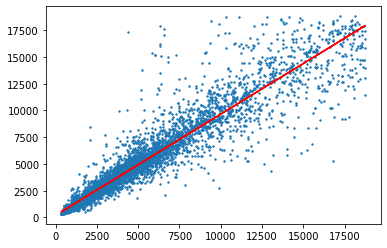

In [32]:
plt.scatter(y_test,y_pred, s=2)

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color = "r")

In [33]:
#Features_1
csv = train_clean[features_1]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeClassifier(random_state=0))
printMetrics(y_test,y_pred)

	 Accuracy: 0.148
	 Precision: 0.16
	 Recall: 0.148
	 F1Score: 0.145
	 Mean Square Error: 1419168.924
	 Root Mean Square Error: 1191.289


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#Features_2
csv = train_clean[features_2]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeClassifier(random_state=0))
printMetrics(y_test,y_pred)


	 Accuracy: 0.052
	 Precision: 0.058
	 Recall: 0.052
	 F1Score: 0.051
	 Mean Square Error: 2607442.762
	 Root Mean Square Error: 1614.758


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
#Features_3
csv = train_clean[features_3]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeClassifier(random_state=0))
printMetrics(y_test,y_pred)

	 Accuracy: 0.083
	 Precision: 0.091
	 Recall: 0.083
	 F1Score: 0.08
	 Mean Square Error: 1327476.366
	 Root Mean Square Error: 1152.162


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ExtraTreeClassifier

In [36]:
from sklearn.tree import ExtraTreeClassifier

In [37]:
#Features_0
csv = train_clean[features_0]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(ExtraTreeClassifier())
printMetrics(y_test,y_pred)

	 Accuracy: 0.104
	 Precision: 0.113
	 Recall: 0.104
	 F1Score: 0.102
	 Mean Square Error: 772886.416
	 Root Mean Square Error: 879.14


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#Features_1
csv = train_clean[features_1]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(ExtraTreeClassifier())
printMetrics(y_test,y_pred)

	 Accuracy: 0.093
	 Precision: 0.107
	 Recall: 0.093
	 F1Score: 0.092
	 Mean Square Error: 1488553.35
	 Root Mean Square Error: 1220.063


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
#Features_2
csv = train_clean[features_2]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(ExtraTreeClassifier())
printMetrics(y_test,y_pred)

	 Accuracy: 0.038
	 Precision: 0.045
	 Recall: 0.038
	 F1Score: 0.037
	 Mean Square Error: 2707519.206
	 Root Mean Square Error: 1645.454


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
#Features_3
csv = train_clean[features_3]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(ExtraTreeClassifier())
printMetrics(y_test,y_pred)

	 Accuracy: 0.047
	 Precision: 0.052
	 Recall: 0.047
	 F1Score: 0.045
	 Mean Square Error: 2164797.399
	 Root Mean Square Error: 1471.325


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNeighborsClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
#Features_0

csv = train_clean[features_0]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(KNeighborsClassifier(n_neighbors=3))
printMetrics(y_test,y_pred)

	 Accuracy: 0.026
	 Precision: 0.023
	 Recall: 0.026
	 F1Score: 0.022
	 Mean Square Error: 2412398.04
	 Root Mean Square Error: 1553.19


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
#Features_1
csv = train_clean[features_1]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(KNeighborsClassifier(n_neighbors=3))
printMetrics(y_test,y_pred)

	 Accuracy: 0.061
	 Precision: 0.064
	 Recall: 0.061
	 F1Score: 0.058
	 Mean Square Error: 1550721.698
	 Root Mean Square Error: 1245.28


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#Features_2
csv = train_clean[features_2]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(KNeighborsClassifier(n_neighbors=3))
print(type(y_test),type(y_pred))
printMetrics(y_test,y_pred)

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
	 Accuracy: 0.034
	 Precision: 0.037
	 Recall: 0.034
	 F1Score: 0.032
	 Mean Square Error: 3007102.03
	 Root Mean Square Error: 1734.1


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RandomForestRegressor - NO


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [46]:
#Features_0

csv = train_clean[features_0]
csv
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(RandomForestRegressor(random_state=0))
y_pred = y_pred.round()
print(type(y_test),type(y_pred))

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [47]:
printMetrics(y_test,y_pred)

	 Accuracy: 0.005
	 Precision: 0.012
	 Recall: 0.005
	 F1Score: 0.007
	 Mean Square Error: 319564.118
	 Root Mean Square Error: 565.3


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


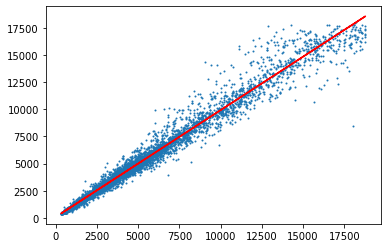

In [48]:
plt.scatter(y_test,y_pred, s=1)

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color = "r")

## ExportingPredictions


In [49]:
# Extra Tree Classifier - features:all
X_train, X_test, y_train, y_test = split(train_clean)
results1 = predictModel(ExtraTreeClassifier())
results1 = pd.DataFrame(results, columns=["price"])

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 8 

In [ ]:
#results.to_csv("outputs/1.1")

In [ ]:
"""
csv = train_clean[features_1]
csv.shape
X_train, X_test, y_train, y_test = split(csv)
y_pred = fitModel(DecisionTreeClassifier(random_state=0))
printMetrics(y_test,y_pred)
"""

In [ ]:
# Extra Tree Classifier - features: all except "id" and "depth"

X_train, X_test, y_train, y_test = split(train_clean[features_1])
results2 = predictModel(DecisionTreeClassifier(random_state=0))
results2 = pd.DataFrame(results, columns=["price"])

In [ ]:
#wrong
results2

In [ ]:
#results2.to_csv("outputs/1.2")

In [ ]:
# Extra Tree Classifier - features: all except "id" and "depth"

X_train, X_test, y_train, y_test = split(train_clean[features_1])
results3 = predictModel(DecisionTreeClassifier(random_state=0))
results3 = pd.DataFrame(results3, columns=["price"])

In [ ]:
results3 

In [ ]:
results3.to_csv("outputs/1.3")